In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os # LITTLE THING TO CORRECT AT THE END IF WE HAVE ENOUGH TIME. OTHERWISE DELETE IT
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Basic functions:

def data_exp(): # first exploration
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)
    return data.sample(5)

def data_clean(): # to standarize column names
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()

## 01 - Problem (case study)

Goal: We want to find the next Mbappé

## 02 - Getting Data

In [5]:
data = pd.read_csv('fifa21_male2.csv')
data_exp()

The dataframe shape is (17125, 107) .
 
The dataframe columns are:
Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)
 
The dataframe data types are:
ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
14215,248337,S. Jarl,20,58,Norway,Sarpsborg 08 FF,59,CDM,CDM CB,https://cdn.sofifa.com/players/248/337/20_120.png,https://cdn.sofifa.com/teams/112199/light_60.png,https://cdn.sofifa.com/flags/no.png,70,Sarpsborg 08 FF 2019 ~ 2021,"6'1""",154lbs,Right,12,"Jan 31, 2019",NaN,€210K,€600,€305K,2019 ~ 2021,204,42,25,46,61,30.0,245,58,40.0,35,60,52,299,66,59,58.0,56,60.0,268,57,58.0,61,62,30,259,56,53.0,56.0,54.0,40,55.0,165,54,56,55.0,52,13,11,11,10,7,1492,320,2 ★,2★,Medium,Medium,1 ★,62,35,53,56,54,60,3,49+2,49+2,49+2,52+0,52+0,52+0,52+0,52+0,53+2,53+2,53+2,54+2,55+2,55+2,55+2,54+2,55+2,57+2,57+2,57+2,55+2,55+2,55+2,55+2,55+2,55+2,15+2,Male
2736,192072,A. Stoian,29,67,Romania,FC Viitorul,67,LW,LW CM,https://cdn.sofifa.com/players/192/072/20_120.png,https://cdn.sofifa.com/teams/113180/light_60.png,https://cdn.sofifa.com/flags/ro.png,67,FC Viitorul 2020 ~ 2021,"5'11""",154lbs,Right,0,"Sep 29, 2020",NaN,€750K,€4K,€1M,2020 ~ 2021,318,66,59,58,68,67.0,358,71,77.0,73,66,71,364,67,69,87.0,61,80.0,331,70,82.0,70,38,71,268,59,22.0,63.0,59.0,65,71.0,103,41,30,32.0,45,10,11,7,11,6,1787,359,5 ★,4★,High,High,1 ★,68,65,66,73,35,52,5,63+2,63+2,63+2,67+0,66+0,66+0,66+0,67+0,67+0,67+0,67+0,67+0,62+2,62+2,62+2,67+0,53+2,50+2,50+2,50+2,53+2,50+2,44+2,44+2,44+2,50+2,15+2,Male
16425,257071,E. Kaplan,19,59,Azerbaijan,Medipol Başakşehir FK,59,LB,LB,https://cdn.sofifa.com/players/257/071/20_120.png,https://cdn.sofifa.com/teams/101014/light_60.png,https://cdn.sofifa.com/flags/az.png,72,Medipol Başakşehir FK 2019 ~ 2023,"5'9""",152lbs,Left,13,"Jan 14, 2019",NaN,€275K,€3K,€694K,2019 ~ 2023,198,56,28,51,37,26.0,211,66,37.0,34,29,45,317,64,64,58.0,55,76.0,228,30,62.0,59,45,32,249,57,58.0,54.0,37.0,43,41.0,181,48,69,64.0,42,8,8,8,6,12,1426,303,2 ★,2★,Low,Low,1 ★,64,31,39,59,58,52,8,45+2,45+2,45+2,50+0,48+0,48+0,48+0,50+0,46+2,46+2,46+2,51+2,45+2,45+2,45+2,51+2,56+2,50+2,50+2,50+2,56+2,57+2,56+2,56+2,56+2,57+2,14+2,Male
11246,238958,R. Harper,20,67,England,West Bromwich Albion,69,CM,CM CDM,https://cdn.sofifa.com/players/238/958/20_120.png,https://cdn.sofifa.com/teams/109/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,79,West Bromwich Albion 2017 ~ 2022,"6'2""",168lbs,Right,12,"Apr 1, 2017",NaN,€1.3M,€18K,€2.9M,2017 ~ 2022,279,56,42,60,71,50.0,291,67,42.0,44,69,69,347,69,67,68.0,68,75.0,347,69,71.0,76,71,60,316,71,55.0,64.0,70.0,56,76.0,183,64,60,59.0,60,13,10,11,13,13,1823,386,3 ★,3★,Medium,Medium,1 ★,68,53,65,68,60,72,68,62+2,62+2,62+2,64+0,65+0,65+0,65+0,64+0,66+2,66+2,66+2,66+2,67+2,67+2,67+2,66+2,64+2,66+2,66+2,66+2,64+2,63+2,63+2,63+2,63+2,63+2,18+2,Male
406,135708,C. Blanco,42,71,Mexico,Club América,71,CAM,CAM,https://cdn.sofifa.com/players/135/708/16_120.png,https://cdn.sofifa.com/teams/1879/light_60.png,https://cdn.sofifa.com/flags/mx.png,71,Club América 2016 ~ 2016,"5'10""",176lbs,Right,0,"Feb 26, 2016",NaN,€0,€20K,€0,2016 ~ 2016,333,73,60,50,79,71.0,403,71,86.0,86,79,81,242,28,26,34.0,75,79.0,266,66,31.0,25,67,77,354,72,35.0,69.0,84.0,94,NaN,88,18,32,38.0,55,6,12,12,16,9,1741,332,5 ★,4★,High,Low,2 ★,27,67,80,71,31,56,6,64+0,64+0,64+0,67+0,68+0,68+0,68+0,67+0,71+0,71+0,71+0,66+0,70+0,70+0,70+0,66+0,49+0,56+0,56+0,56+0,49+0,45+0,45+0,45+0,45+0,45+0,18+0,Male


This dataset has 17.125 player information in  unique data in 107 columns. 
* The features that might be useful for the purpose of our analysis are **example** like `Example1`, `Example2`, `Example3` and `Example4`.
* Also, since we want to know their **buying behavior** we will need data from numerical features such as `Example1`, `Example2` or `Example3`
* The target for our dataset will be `Value`.

## 03 - Cleaning/Wrangling

In [6]:
data_clean() # to standarize the column names

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)



In [7]:
data = data.rename(columns={"team_&_contract": "team&contract"})

In [8]:
data_copy = data.copy() # as best practices, we make a copy of our data

In [9]:
# Check if "id" has duplicated values
if data_copy['id'].duplicated().any():
    print("There are duplicate values in 'id'.")
else:
    print("All values in 'id' are unique.")


All values in 'id' are unique.


In [10]:
data_headers = list(data.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers)

# TO PUT THE TARGET AT THE END. LET'S DO IT LATER

The Column Headers are : ['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp', 'position', 'player_photo', 'club_logo', 'flag_photo', 'pot', 'team&contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',

### Dealing with Null values

In [11]:
# Check for empty cells in the entire DataFrame
null_cols = data_copy.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols

club                 23
position            413
club_logo            23
joined               58
loan_date_end     16215
volleys              58
curve                58
agility              58
balance              58
jumping              58
interceptions         7
positioning           7
vision               58
composure           423
sliding_tackle       58
a/w                  89
d/w                  89
dtype: int64

In [12]:
# Get rid of loan_date_end since it has to many empty values
data_copy = data_copy.drop(columns=["loan_date_end"])

In [13]:
# Create a new dataset without the rows with empty cells in "value" column
# data2 = data.dropna(subset=['value'])
# data2

In [14]:
# function to convert value to unified format
def convert_value(value):
    if isinstance(value, float):
        return value
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value.endswith('M'):
        return float(value[1:-1]) * 1000000
    else:
        try:
            return float(value)
        except ValueError:
            return None

# apply function to value column
data_copy['value'] = data_copy['value'].apply(convert_value)

data.sample(2)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team&contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
5150,209567,R. Sufyani,33,65,Saudi Arabia,Al Taawoun,65,RM,RM ST,https://cdn.sofifa.com/players/209/567/20_120.png,https://cdn.sofifa.com/teams/112393/light_60.png,https://cdn.sofifa.com/flags/sa.png,65,Al Taawoun 2018 ~ 2024,"5'10""",161lbs,Left,0,"Jun 10, 2018",NaN,€325K,€6K,€536K,2018 ~ 2024,303,62,65,60,63,53.0,315,63,69.0,57,60,66,341,69,69,78.0,62,63.0,343,68,78.0,72,72,53,277,52,34.0,64.0,61.0,66,57.0,94,23,35,36.0,57,13,12,12,13,7,1730,361,3 ★,3★,Medium,Low,1 ★,69,63,62,65,34,68,4,64+1,64+1,64+1,64+0,64+0,64+0,64+0,64+0,64+1,64+1,64+1,64+1,60+2,60+2,60+2,64+1,53+2,51+2,51+2,51+2,53+2,51+2,47+2,47+2,47+2,51+2,17+2,Male
9053,230623,S. Bakış,26,67,Turkey,Heracles Almelo,69,ST,ST,https://cdn.sofifa.com/players/230/623/20_120.png,https://cdn.sofifa.com/teams/100634/light_60.png,https://cdn.sofifa.com/flags/tr.png,69,Heracles Almelo 2020 ~ 2023,"6'2""",176lbs,Right,2,"Jul 21, 2020",NaN,€925K,€3K,€1.4M,2020 ~ 2023,311,35,71,75,64,66.0,235,60,34.0,30,43,68,240,40,34,42.0,69,55.0,302,69,45.0,50,77,61,264,54,24.0,72.0,48.0,66,51.0,71,20,27,24.0,49,7,12,14,11,5,1472,308,3 ★,2★,Medium,Low,1 ★,37,68,49,61,29,64,5,67+2,67+2,67+2,58+0,63+0,63+0,63+0,58+0,60+2,60+2,60+2,56+2,56+2,56+2,56+2,56+2,42+2,45+2,45+2,45+2,42+2,40+2,43+2,43+2,43+2,40+2,16+2,Male


In [15]:
# Check the data type of the 'value' column
data_copy['value'].dtype

dtype('float64')

In [16]:
# id is unique, so I passed it as the index
data_copy = data_copy.set_index('id')

In [17]:
data_copy.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team&contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",625000.0,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",600000.0,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",1100000.0,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",5500000.0,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [ ]:
## NORMALIZE or other transformations if it shows weirdos numbers AT THE END

In [18]:
# checking if column 'team&contract' can be dropped since info is in 'club' and 'contract'
selected_columns = data_copy.loc[:, ['club', 'team&contract', 'contract']]
selected_columns

,club,team&contract,contract
id,,,
2,Udinese,Udinese 2008 ~ 2016,2008 ~ 2016
16,KAS Eupen,KAS Eupen 2014 ~ 2019,2014 ~ 2019
27,Coventry City,Coventry City 2016 ~ 2020,2016 ~ 2020
36,Sunderland,Sunderland 2009,2009
41,Vissel Kobe,Vissel Kobe 2018 ~ 2021,2018 ~ 2021
...,...,...,...
259088,CD Tondela,"CD Tondela Jun 30, 2021 On Loan","Jun 30, 2021 On Loan"
259090,Burnley,Burnley 2020 ~ 2021,2020 ~ 2021
259091,Burnley,Burnley 2020 ~ 2022,2020 ~ 2022


In [19]:
# Get rid of several columns
data_copy = data_copy.drop(columns=["player_photo", "club_logo", "flag_photo", "team&contract", "gender"])

### Encoding

In [20]:
# Convert height data from feet and inches to centimeters

## LET'S CHECK IT GUYS IS IMPORTANT ##

data_copy['height_cm'] = data_copy['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1].replace('"', ''))*2.54)
data_copy['height_cm']

# Drop the original 'height' column
data_copy.drop('height', axis=1, inplace=True)

In [21]:
# Convert weight data from pounds to kilograms
data_copy['weight_kg'] = data_copy['weight'].apply(lambda x: int(x[:-3]) / 2.2046)
data_copy['weight_kg']

# Drop the original 'weight' column
data_copy.drop('weight', axis=1, inplace=True)

In [22]:
# Convert wage and release_clause data to numeric value
data_copy['wage'] = data_copy['wage'].apply(convert_value)
data_copy['release_clause'] = data_copy['release_clause'].apply(convert_value)
data_copy['wage']

id
2          7000.0
16         7000.0
27        15000.0
36            NaN
41        12000.0
           ...   
259088     2000.0
259090     3000.0
259091     2000.0
259101     3000.0
259105     2000.0
Name: wage, Length: 17125, dtype: float64

In [23]:
data_copy['release_clause']

id
2               NaN
16        1100000.0
27              NaN
36              NaN
41        7200000.0
            ...    
259088          NaN
259090     273000.0
259091     273000.0
259101     784000.0
259105     788000.0
Name: release_clause, Length: 17125, dtype: float64

In [24]:
# Apply lambda function to 'w/f' column
data_copy['w/f_encoded'] = data_copy['w/f'].apply(lambda x: int(x[0]))
data_copy['w/f_encoded']

id
2         3
16        4
27        4
36        3
41        4
         ..
259088    2
259090    3
259091    3
259101    4
259105    3
Name: w/f_encoded, Length: 17125, dtype: int64

In [25]:
# Drop the original 'w/f' column
data_copy.drop('w/f', axis=1, inplace=True)

## MAKE A FUNCTION TO DROP THE COLUMNS GUYS

In [26]:
# Apply lambda function to 'w/f' column
data_copy['sm_encoded'] = data_copy['sm'].apply(lambda x: int(x[0]))
data_copy['sm_encoded']

id
2         2
16        3
27        4
36        1
41        4
         ..
259088    2
259090    2
259091    2
259101    2
259105    3
Name: sm_encoded, Length: 17125, dtype: int64

In [27]:
# Drop the original 'sm' column
data_copy.drop('sm', axis=1, inplace=True)

In [28]:
# Apply lambda function to 'w/f' column
data_copy['ir_encoded'] = data_copy['ir'].apply(lambda x: int(x[0]))
data_copy['ir_encoded']

## DEFINE A FUNCTION FOR LAMBDA

id
2         2
16        1
27        2
36        1
41        4
         ..
259088    1
259090    1
259091    1
259101    1
259105    1
Name: ir_encoded, Length: 17125, dtype: int64

In [29]:
# Drop the original 'sm' column
data_copy.drop('ir', axis=1, inplace=True)

In [30]:
## HUGO> to encode left and right

In [31]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Fit and transform the data frame column
data_copy['a/w_encoded'] = le.fit_transform(data_copy['a/w'])
data_copy['d/w_encoded'] = le.fit_transform(data_copy['d/w'])

# Drop the original 'a/w' and 'd/w' column
data_copy.drop('a/w', axis=1, inplace=True)
data_copy.drop('d/w', axis=1, inplace=True)

In [32]:
# Modify cells with 'K' character, leave others unchanged, turn it to integer
data_copy['hits'] = data_copy['hits'].apply(lambda x: float(x.replace('K','')) * 1000 if isinstance(x, str) and 'K' in x else x).astype(int)

In [33]:
data_copy['hits'].unique()

array([   4,   11,    3,  149,    7,    9,   16,   10,    5,    8,  154,
          6,   18,   22,   34,   19,   15,   14,   27,   21,  309,   32,
        151,  750,   13,   39,   83,   20,  442,   92,   23,   29,   30,
         12,   31,  297,   36,   90,   88,   24,  171,   40,   25,   60,
        103,   38,   82,   57,   17,   26,   44,   67,  571,   61,   68,
         37,  231,   58,   62,   28,   51,   45,   80,  162,   59,  138,
        220,   93,   47,  281,   33,   46,   35,  830,   43,   64,   49,
         48,   54,  259,  161,   74,  434,   42,  131,  222,  229,  125,
        142,   81,  128,   78,  109,   72,   75,  111,   63,  123,  136,
         89,   55,  663,   97,   41,  143,   73,  464,  232,  164,  212,
        129,   79,  107,   69,  117,   71,  101,  202,  140,  110,   66,
       6300,  122,   95,  189,  157,  215,   52,  248,  178,  238,  208,
        214,  407, 1200,  349,  180,  224,  155,  147,   98,   99,  152,
        148,  120,  167,  158,   70,  328,  183,   

In [35]:
# Create a new dataframe with only the numerical columns using select_dtypes
numericals = data_copy.select_dtypes(np.number).apply(lambda x: round(x,2))
numericals.head()

,age,ova,bov,pot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,w/f_encoded,sm_encoded,ir_encoded,a/w_encoded,d/w_encoded
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,625000.0,7000.0,NaN,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,4,182.88,82.10,3,2,2,2,0
16,37,71,70,71,0,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,177.80,64.86,4,3,1,2,2
27,33,71,71,71,0,1100000.0,15000.0,NaN,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,11,175.26,73.03,4,4,2,2,1
36,36,68,70,82,14,NaN,NaN,NaN,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,61,66,66,69,47,60,3,180.34,74.84,3,1,1,3,3
41,36,81,82,81,0,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,149,170.18,68.04,4,4,4,0,2


In [36]:
data_headers2 = list(numericals.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers2)

The Column Headers are : ['age', 'ova', 'bov', 'pot', 'growth', 'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'height_cm', 'weight_kg', 'w/f_encoded', 'sm_encoded', 'ir_encoded', 'a/w_encoded', 'd/w_encoded']


In [44]:
final_data = data_copy[['age', 'ova', 'bov', 'pot', 'wage', 'goalkeeping', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'height_cm', 'weight_kg', 'w/f_encoded', 'sm_encoded', 'ir_encoded', 'a/w_encoded', 'd/w_encoded', 'value']]
final_data.shape
final_data.head()

,age,ova,bov,pot,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,w/f_encoded,sm_encoded,ir_encoded,a/w_encoded,d/w_encoded,value
id,,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,56,1929,408,71,59,70,71,68,69,4,182.88,82.101061,3,2,2,2,0,625000.0
16,37,71,70,71,56,1906,385,53,69,73,69,58,63,4,177.80,64.864374,4,3,1,2,2,600000.0
27,33,71,71,71,51,1770,354,45,68,76,77,36,52,11,175.26,73.029121,4,4,2,2,1,1100000.0
36,36,68,70,82,68,1348,369,61,66,66,69,47,60,3,180.34,74.843509,3,1,1,3,3,NaN
41,36,81,82,81,45,2014,420,58,70,85,85,63,59,149,170.18,68.039554,4,4,4,0,2,5500000.0


In [45]:
final_data.shape

(17125, 22)

In [48]:
# Check for empty cells in the entire DataFrame
null_cols2 = final_data.isnull().sum()
null_cols2 = null_cols2[null_cols2 > 0]
null_cols2

value    457
dtype: int64

In [46]:
final_data2 = final_data[['age', 'ova', 'bov', 'pot', 'goalkeeping', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'height_cm', 'weight_kg', 'w/f_encoded', 'sm_encoded', 'ir_encoded', 'a/w_encoded', 'd/w_encoded', 'value']]


In [47]:
# Create a new dataset without the rows with empty cells in "value" column
final_data_final = final_data2.dropna(subset=['value'])
final_data_final

,age,ova,bov,pot,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,w/f_encoded,sm_encoded,ir_encoded,a/w_encoded,d/w_encoded,value
id,,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,56,1929,408,71,59,70,71,68,69,4,182.88,82.101061,3,2,2,2,0,625000.0
16,37,71,70,71,56,1906,385,53,69,73,69,58,63,4,177.80,64.864374,4,3,1,2,2,600000.0
27,33,71,71,71,51,1770,354,45,68,76,77,36,52,11,175.26,73.029121,4,4,2,2,1,1100000.0
41,36,81,82,81,45,2014,420,58,70,85,85,63,59,149,170.18,68.039554,4,4,4,0,2,5500000.0
61,27,66,66,70,46,1649,360,91,56,56,67,27,63,7,172.72,73.936315,2,3,2,2,2,725000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,39,1367,302,54,30,37,48,64,69,5,198.12,74.843509,2,2,1,2,2,550000.0
259090,18,56,58,66,57,1529,319,62,46,57,56,43,55,5,177.80,77.111494,3,2,1,2,2,130000.0
259091,18,56,56,67,40,1430,303,63,35,44,52,54,55,3,175.26,69.853942,3,2,1,2,2,130000.0


In [49]:
# Check for empty cells in the entire DataFrame
null_cols3 = final_data_final.isnull().sum()
null_cols3 = null_cols3[null_cols3 > 0]
null_cols3

Series([], dtype: int64)

In [50]:
## MAKE COMMENTS EXPLAINING WHY WE DO ALL THIS

In [51]:
cr_data = final_data_final.corr()
cr_data = round(cr_data, 2)
cr_data

,age,ova,bov,pot,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,w/f_encoded,sm_encoded,ir_encoded,a/w_encoded,d/w_encoded,value
age,1.00,0.52,0.46,-0.25,0.12,0.29,0.42,-0.17,0.31,0.40,0.25,0.22,0.44,-0.08,0.09,0.26,0.08,0.08,0.39,-0.05,-0.14,0.11
ova,0.52,1.00,0.99,0.59,0.04,0.61,0.83,0.20,0.49,0.70,0.65,0.34,0.54,0.24,0.02,0.15,0.20,0.35,0.48,-0.18,-0.16,0.65
bov,0.46,0.99,1.00,0.62,-0.01,0.64,0.83,0.21,0.48,0.69,0.64,0.35,0.54,0.26,0.01,0.13,0.21,0.38,0.46,-0.18,-0.17,0.66
pot,-0.25,0.59,0.62,1.00,-0.01,0.33,0.47,0.26,0.24,0.39,0.44,0.17,0.15,0.35,-0.03,-0.05,0.14,0.25,0.28,-0.12,-0.05,0.58
goalkeeping,0.12,0.04,-0.01,-0.01,1.00,-0.63,0.09,-0.01,0.25,0.17,0.16,-0.20,0.06,-0.03,0.35,0.33,-0.20,-0.58,0.01,0.22,0.18,0.00
total_stats,0.29,0.61,0.64,0.33,-0.63,1.00,0.69,0.26,0.33,0.56,0.50,0.39,0.30,0.16,-0.37,-0.25,0.32,0.72,0.29,-0.32,-0.22,0.40
base_stats,0.42,0.83,0.83,0.47,0.09,0.69,1.00,0.44,0.62,0.85,0.80,0.33,0.49,0.20,-0.12,0.00,0.22,0.38,0.35,-0.23,-0.12,0.54
pac,-0.17,0.20,0.21,0.26,-0.01,0.26,0.44,1.00,0.31,0.25,0.52,-0.25,-0.13,0.13,-0.38,-0.34,0.13,0.33,-0.05,-0.29,0.08,0.21
sho,0.31,0.49,0.48,0.24,0.25,0.33,0.62,0.31,1.00,0.66,0.77,-0.42,0.05,0.12,-0.10,0.01,0.26,0.34,0.28,-0.19,0.04,0.33
pas,0.40,0.70,0.69,0.39,0.17,0.56,0.85,0.25,0.66,1.00,0.82,0.15,0.17,0.16,-0.21,-0.10,0.23,0.38,0.37,-0.15,-0.04,0.46


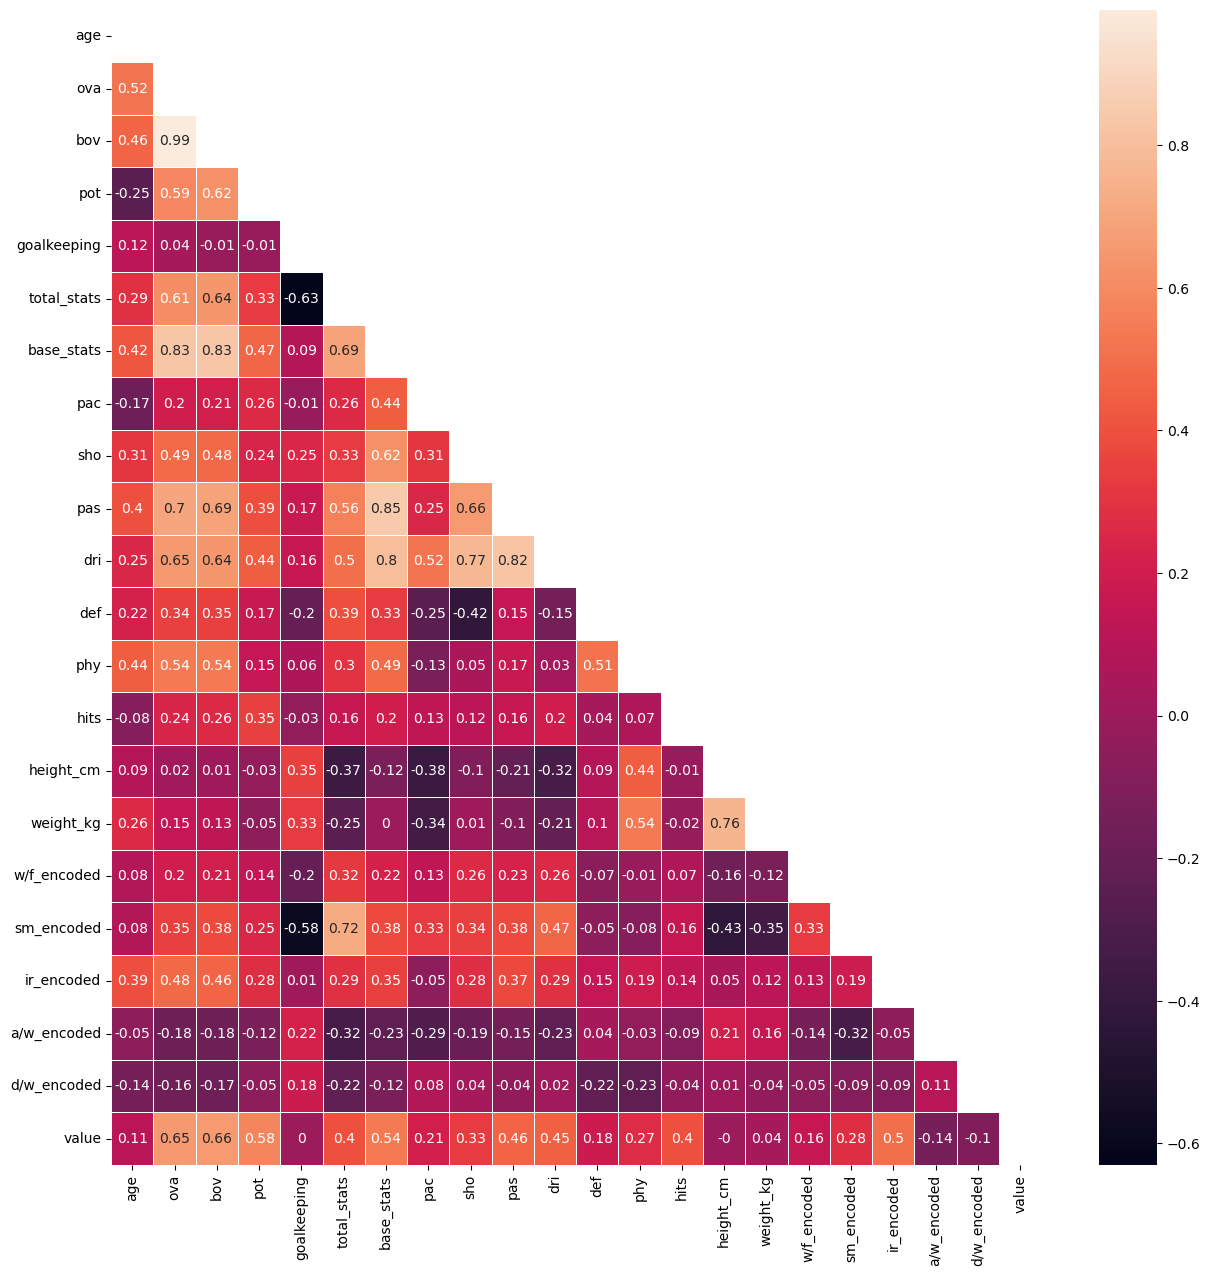

In [57]:
# Heatmap plot
mask = np.zeros_like(cr_data)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(cr_data, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

In [60]:
# After checking the features and target value and the correlation within the values we decide to remove: bov
final_data3 = final_data_final[['age', 'ova', 'pot', 'goalkeeping', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'height_cm', 'weight_kg', 'w/f_encoded', 'sm_encoded', 'ir_encoded', 'a/w_encoded', 'd/w_encoded', 'value']]

In [61]:
Y = final_data3['value']
X = final_data3.drop(['value'], axis=1) 
X.sample(5)

,age,ova,pot,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,height_cm,weight_kg,w/f_encoded,sm_encoded,ir_encoded,a/w_encoded,d/w_encoded
id,,,,,,,,,,,,,,,,,,,,
208585,26,67,68,60,1698,344,64,66,68,72,37,37,3,177.80,71.214733,3,3,1,2,2
212602,26,76,79,47,1781,390,71,40,62,67,74,76,280,185.42,76.204300,3,2,1,2,2
243185,21,65,76,57,1420,327,80,25,42,43,65,72,24,195.58,87.997823,3,2,1,2,2
225482,22,64,74,54,1605,346,73,60,51,66,33,63,6,180.34,73.936315,3,3,1,2,2
189234,30,71,71,51,1987,412,67,72,72,70,65,66,13,182.88,74.843509,2,3,2,2,0


In [63]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [64]:
len(X)*0.7 # Len before the test

11667.599999999999

In [65]:
len(X_test) # Len after the test

5001

In [66]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

In [67]:
predictions = model.predict(X_test)

In [68]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.609013654267344, 3413326.872394625, 11650800337811.273)

In [69]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.609013654267344
RMSE =  3413326.872394625
The value of the metric MSE is  11650800337811.273
MAE =  1854941.4430588179


In [55]:
# WE CAN CHECK THAT LATER AFTER MAKING THE MODEL

In [ ]:
for column in numericals.columns:
    sns.distplot(data[column])
    plt.show()

In [36]:
# Create a new dataframe with only the categorical columns using select_dtypes
categoricals = data_copy.select_dtypes(include = np.object)
categoricals.head()

,name,nationality,club,bp,position,foot,joined,contract,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,Italy,Udinese,LWB,LM,Left,"Jul 1, 2008",2008 ~ 2016,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,Right,"Jul 19, 2014",2014 ~ 2019,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
27,J. Cole,England,Coventry City,CAM,CAM RM RW LM,Right,"Jan 7, 2016",2016 ~ 2020,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,Right,NaN,2009,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,Right,"Jul 16, 2018",2018 ~ 2021,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3


In [ ]:
for var in categoricals:
    counts = categoricals[var].value_counts()
    print("Counts for variable {}: \n{}".format(var, counts))

## 04 - Exploratory Data Analysis

In [ ]:
# Looking at promising talents

In [ ]:
data['pot_minus_ova'] = data['pot'] - data['ova'] 

In [ ]:
# Create a new DataFrame that contains only the rows with "difference" > 10 and age < 21
talents = data[(data['pot_minus_ova'] > 10) & (data['age'] < 21)]
talents.head()

In [ ]:
# Group the data by country and count the number of players in each country
talents_by_country = talents.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
talents_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most promising talents')

# Display the chart
plt.show()


In [ ]:
# Looking at MVPs with rating >80

In [ ]:
mvps = data[(data['ova'] > 80)]

In [ ]:
# Group the data by country and count the number of players in each country
mvps_by_country = mvps.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
mvps_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most valuable players')

# Display the chart
plt.show()


##### Check correlations

In [ ]:
round(data.corr(),2)

In [ ]:
#HEATMAP
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

# from this you can remove multicolinearity > 0.9 with no worry...
## ... > 0.75 is better to check with the model metrics to be sure
### when removing, keep the ones that have the highest correlation with target

In [ ]:
data.info()

## 05 - Processing Data

## 06 - Modeling

## 07 - Model Validation